<a href="https://colab.research.google.com/github/PavanPratapagiri/topic_modeling/blob/main/algorithms/LSA/LSA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import gensim
from gensim import corpora
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import models
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
%matplotlib inline

# Load the dataset
df = pd.read_csv('nytimes_news_articles.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Preprocess the data
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def preprocess(text):
  tokens = tokenizer.tokenize(text.lower())
  tokens = [token for token in tokens if token not in en_stop]
  stemmed_tokens = [p_stemmer.stem(token) for token in tokens]
  return stemmed_tokens

In [ ]:
df['content'] = df['content'].astype(str)
df['processed_text'] = pd.Series(df['content'].values).apply(preprocess)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(df['processed_text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create the corpus
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create the LSA model.
lsa_model = models.LsiModel(corpus=corpus, id2word=dictionary, num_topics=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' 

In [ ]:
# Print the topics.
for idx, topic in lsa_model.print_topics(num_words=10):
    print('Topic: {} \nWords: {}'.format(df['news_category'][idx], topic))

Topic: sports-baseball 
Words: 0.457*"mr" + 0.450*"said" + 0.165*"year" + 0.149*"one" + 0.141*"would" + 0.125*"like" + 0.120*"new" + 0.113*"state" + 0.110*"time" + 0.107*"trump"
Topic: nyregion 
Words: -0.749*"mr" + -0.281*"trump" + 0.134*"year" + 0.123*"one" + 0.117*"said" + -0.112*"clinton" + 0.102*"game" + 0.094*"like" + 0.091*"school" + -0.087*"republican"
Topic: nyregion 
Words: -0.520*"said" + 0.462*"trump" + -0.167*"ms" + 0.158*"game" + 0.141*"republican" + 0.138*"clinton" + 0.119*"like" + 0.108*"campaign" + -0.099*"mr" + 0.098*"would"
Topic: nyregion 
Words: -0.445*"school" + 0.322*"game" + 0.242*"said" + -0.169*"student" + 0.158*"team" + 0.151*"play" + 0.138*"season" + -0.128*"state" + -0.123*"children" + 0.120*"first"
Topic: sports-olympics 
Words: 0.425*"school" + -0.259*"compani" + -0.213*"state" + 0.203*"mr" + 0.157*"ms" + -0.155*"percent" + 0.139*"student" + -0.129*"unit" + -0.128*"trump" + 0.126*"children"
Topic: sports-olympics 
Words: 0.349*"said" + -0.304*"compani" + 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


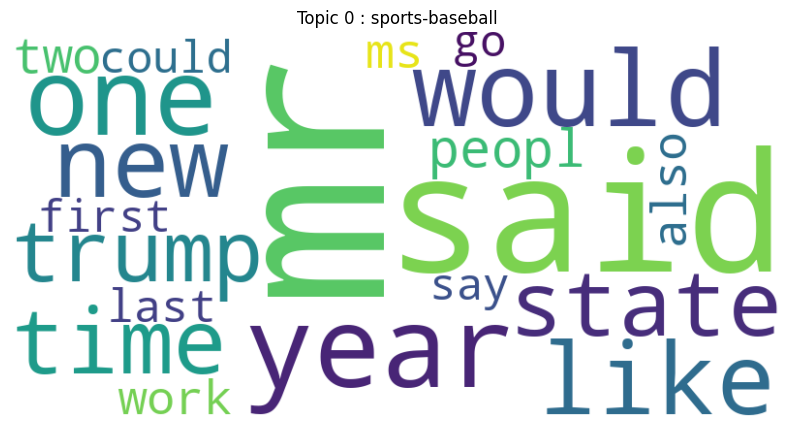

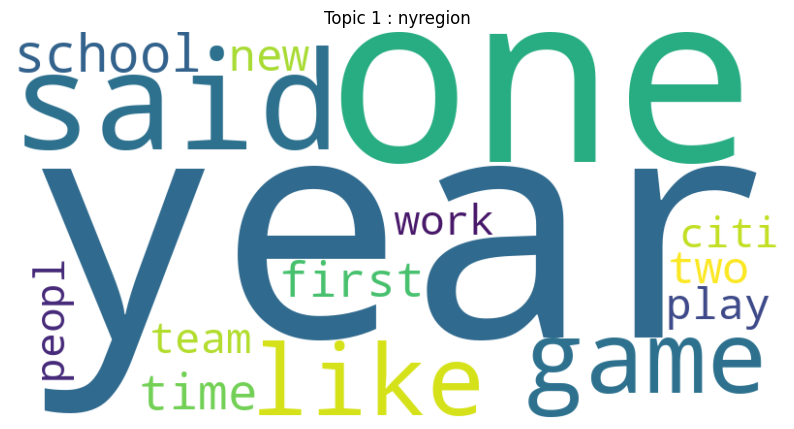

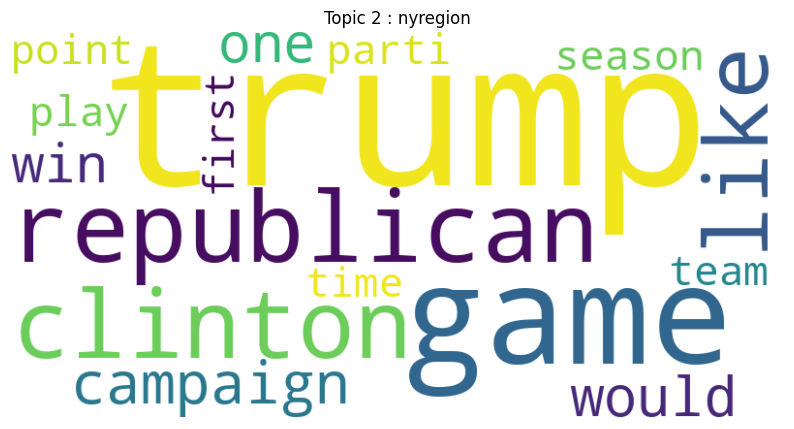

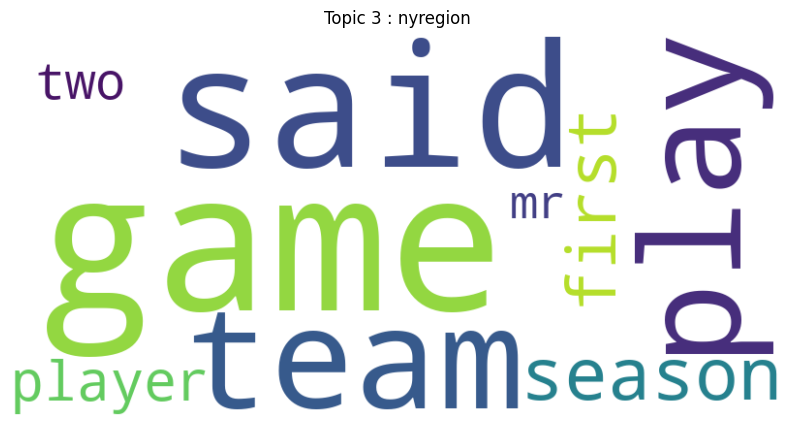

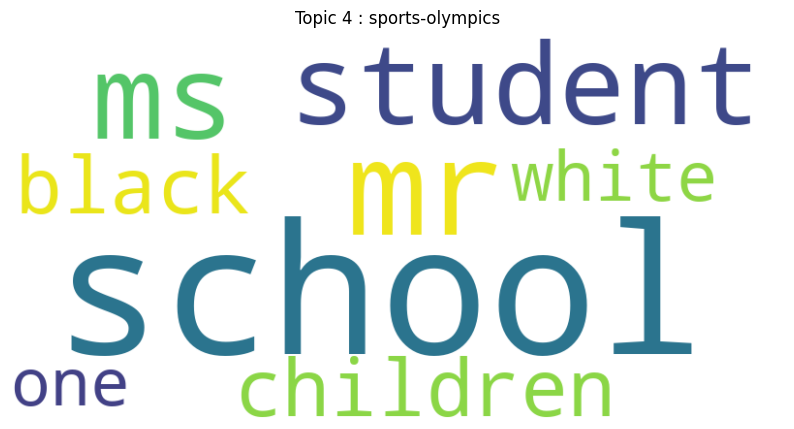

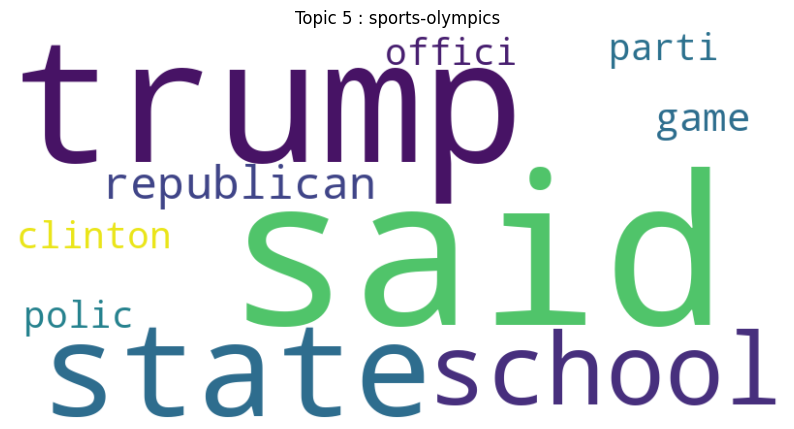

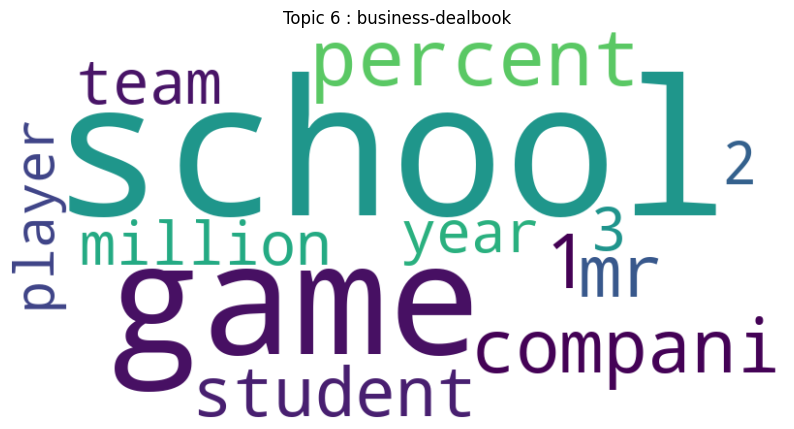

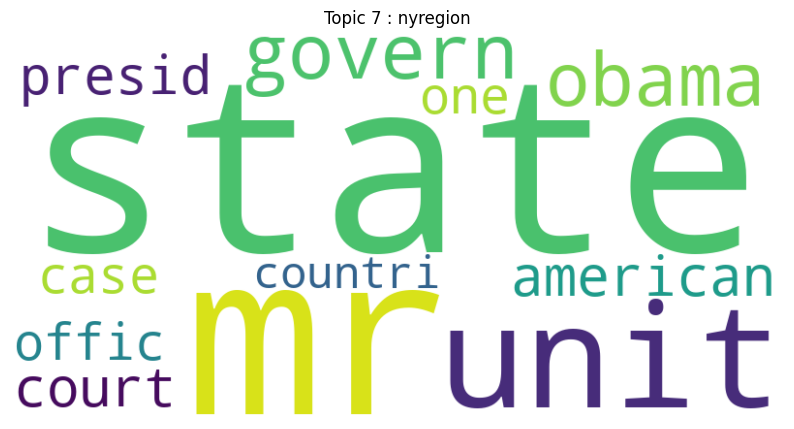

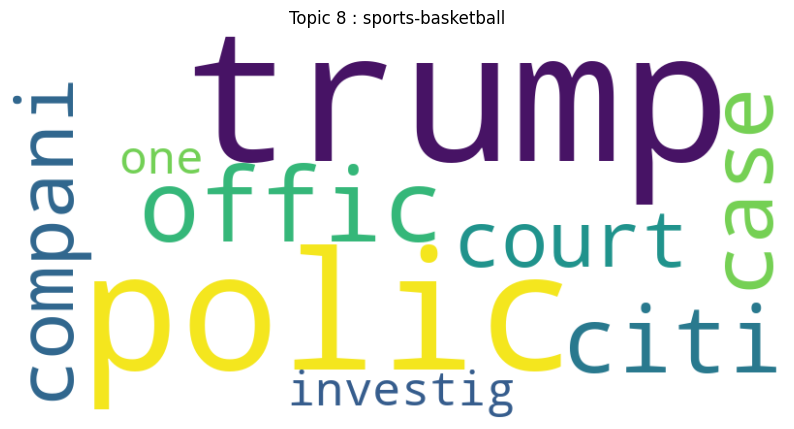

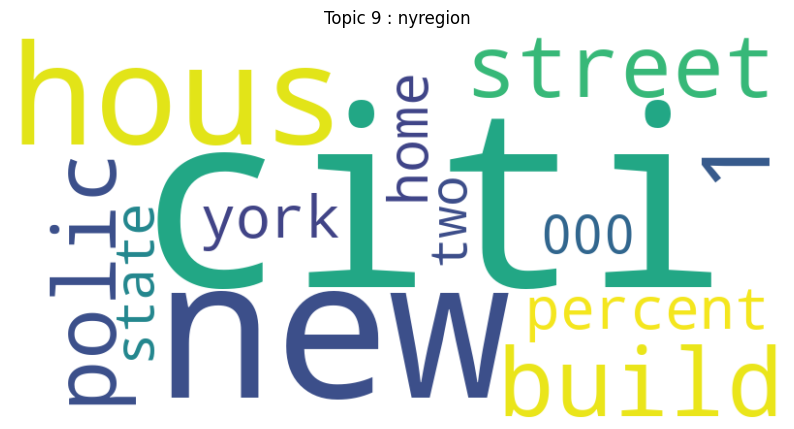

In [ ]:
from wordcloud import WordCloud

# Extract top words for each topic
topics = lsa_model.show_topics(num_topics=10, num_words=20, formatted=False)

# Generate word cloud for each topic
for topic_id, topic in topics:
    word_freq = {word: freq for word, freq in topic}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id} : {df["news_category"][topic_id]}')
    plt.axis('off')
    plt.show()


In [ ]:
# Topic-Word Matrix visualization Create the topic-word matrix
topic_words = [[words for words, _ in lsa_model.show_topic(topic_id)] for topic_id in range(lsa_model.num_topics)]

# Create the DataFrame
topic_words_df = pd.DataFrame(topic_words)

# Set the column names
topic_words_df.columns = [df['news_category'][i] for i in range(lsa_model.num_topics)]

# Display the DataFrame
print(topic_words_df.to_string())


  sports-baseball nyregion nyregion nyregion sports-olympics sports-olympics business-dealbook    nyregion sports-basketball    nyregion
0              mr     said     year      one           would            like               new       state              time       trump
1              mr    trump     year      one            said         clinton              game        like            school  republican
2            said    trump       ms     game      republican         clinton              like    campaign                mr       would
3          school     game     said  student            team            play            season       state          children       first
4          school  compani    state       mr              ms         percent           student        unit             trump    children
5            said  compani    trump       mr           state             new            school  republican              year     million
6          school     game  percent    pe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity

# Read the text data from a CSV file
df = pd.read_csv('/content/nytimes_news_articles.csv')

# Check the structure of the data
print("Shape of DataFrame:", df.shape)
print("Columns:", df.columns)

# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

# Define an LSA model
lsa_model = TruncatedSVD(n_components=10, random_state=42)

# Create a pipeline for vectorization and LSA
pipeline = Pipeline([('tfidf', vectorizer), ('lsa', lsa_model)])

# Data Preprocessing
# Drop rows with missing values in the 'content' column
df = df.dropna(subset=['content'])

# Fill missing values in the 'content' column with an empty string
df['content'].fillna('', inplace=True)

# Fit the pipeline on the text data and transform it
lsa_features = pipeline.fit_transform(df['content'])

# Compute pairwise cosine similarity between documents
similarity_matrix = cosine_similarity(lsa_features)

# Display the similarity matrix
print("Similarity Matrix Shape:", similarity_matrix.shape)
print("Similarity Matrix:")
print(similarity_matrix)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of DataFrame: (8887, 5)
Columns: Index(['date', 'news_category', 'headline', 'content', 'url'], dtype='object')
Similarity Matrix Shape: (8883, 8883)
Similarity Matrix:
[[1.         0.0406431  0.10157947 ... 0.23384321 0.30638477 0.1676826 ]
 [0.0406431  1.         0.94381315 ... 0.90562862 0.74354782 0.81023244]
 [0.10157947 0.94381315 1.         ... 0.93339218 0.76898187 0.85001026]
 ...
 [0.23384321 0.90562862 0.93339218 ... 1.         0.85056022 0.79846131]
 [0.30638477 0.74354782 0.76898187 ... 0.85056022 1.         0.82118041]
 [0.1676826  0.81023244 0.85001026 ... 0.79846131 0.82118041 1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


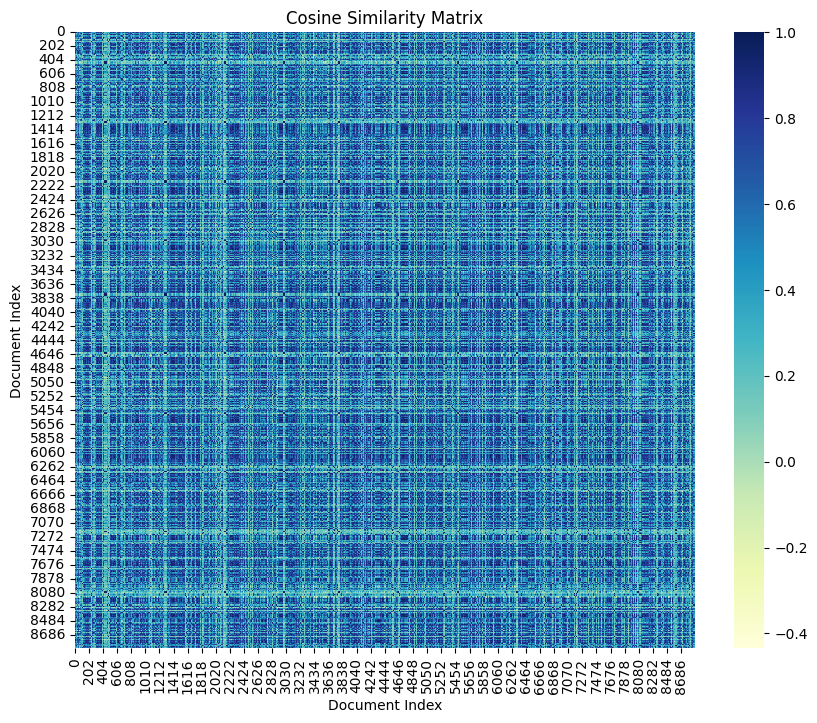

In [ ]:
# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='YlGnBu', annot=False)
plt.title('Cosine Similarity Matrix')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


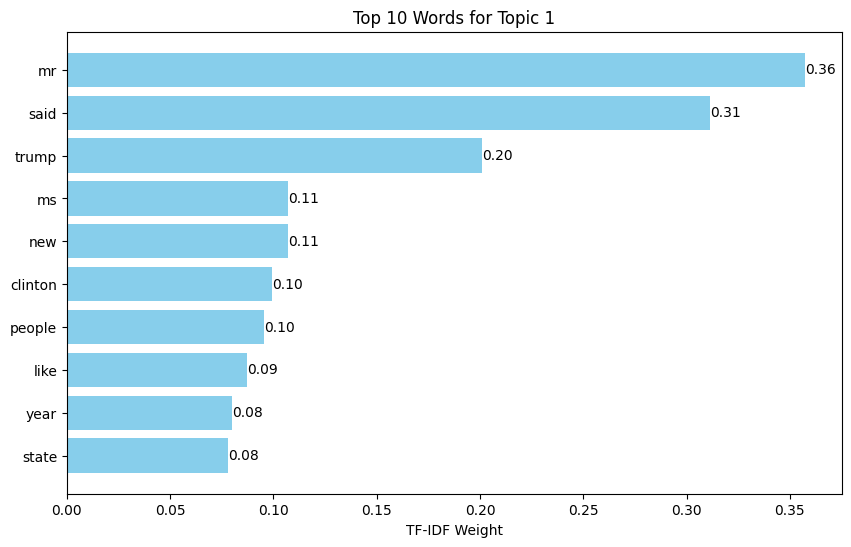

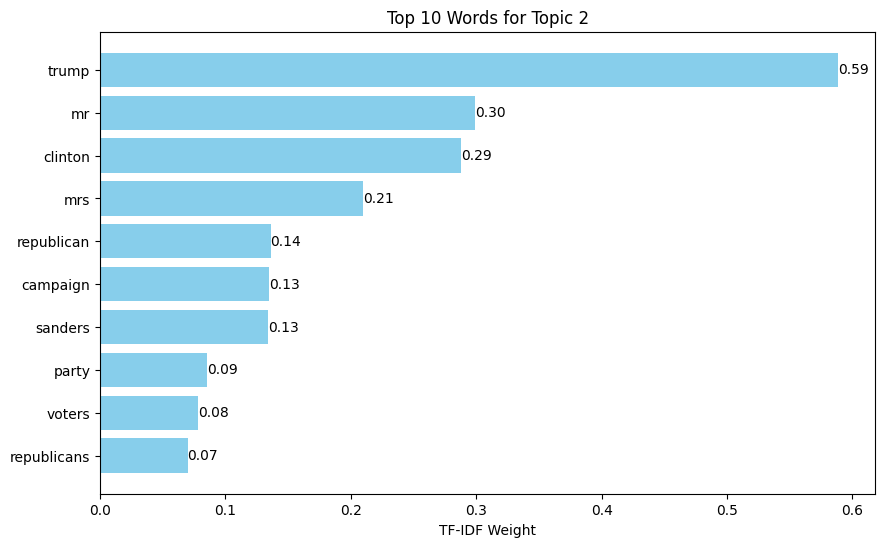

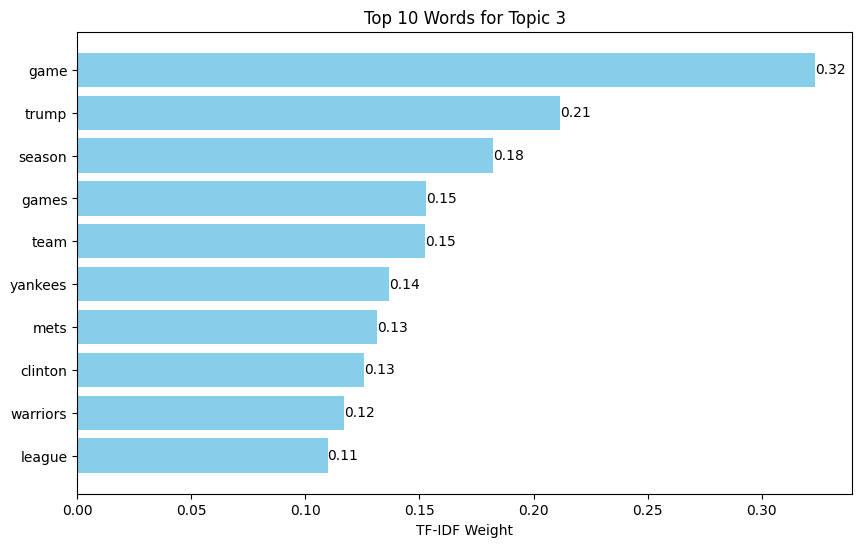

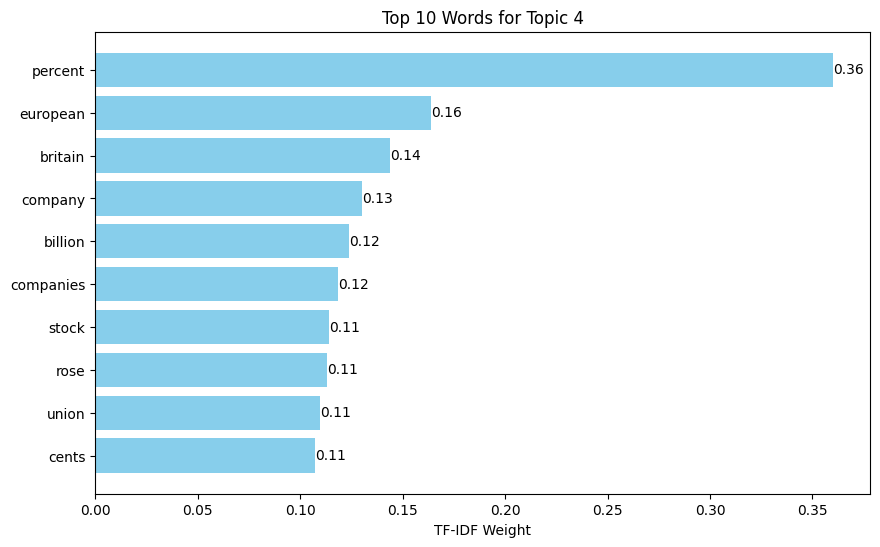

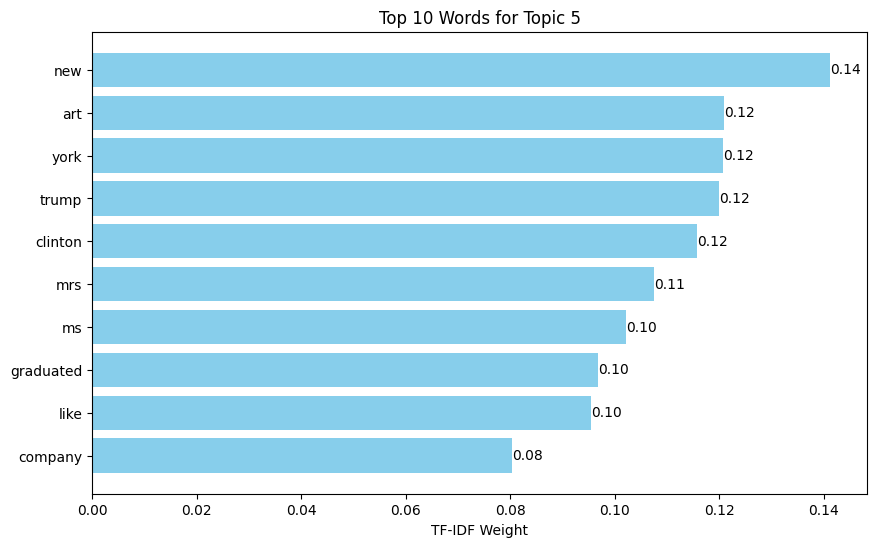

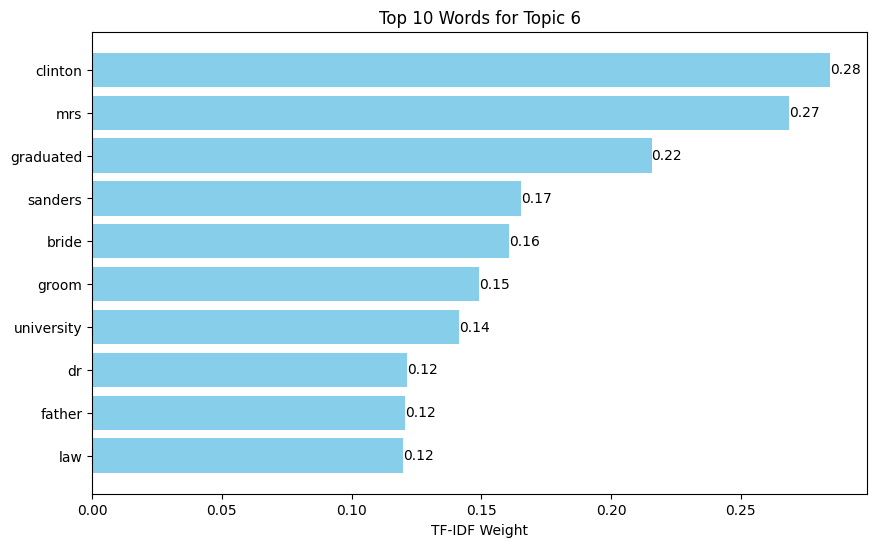

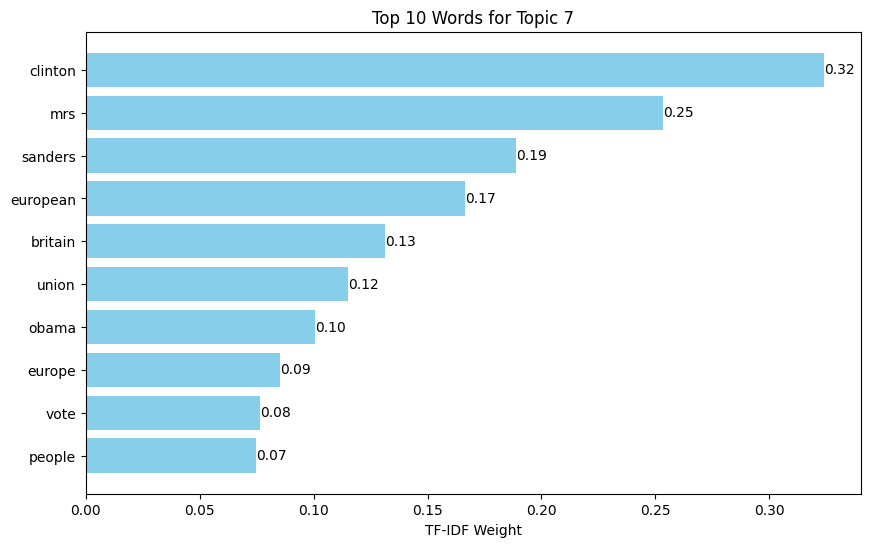

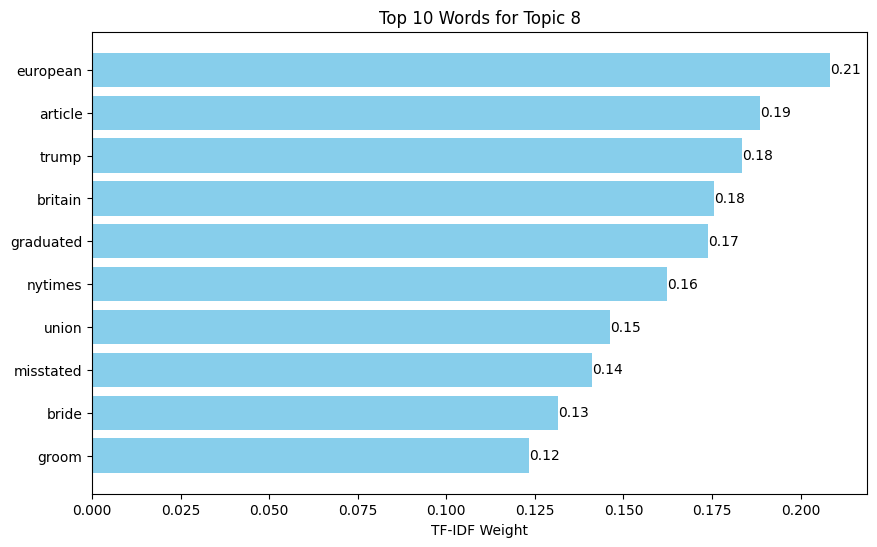

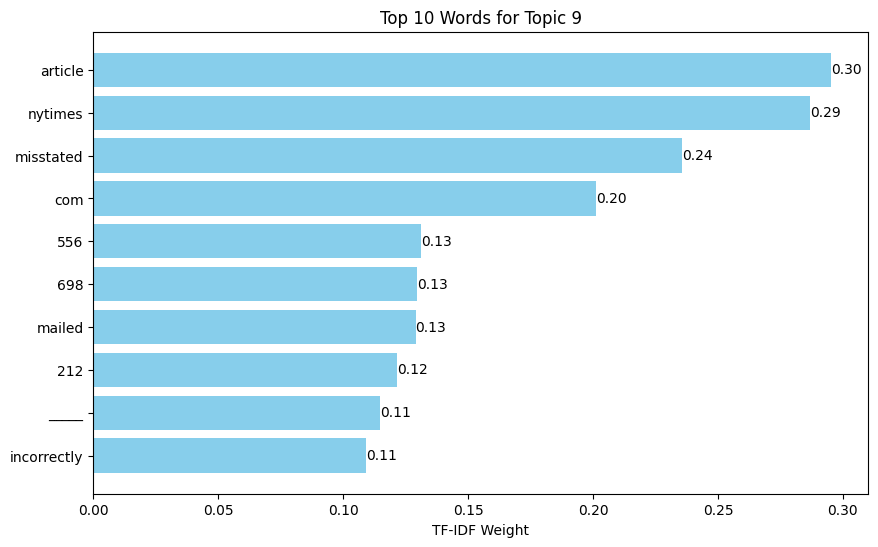

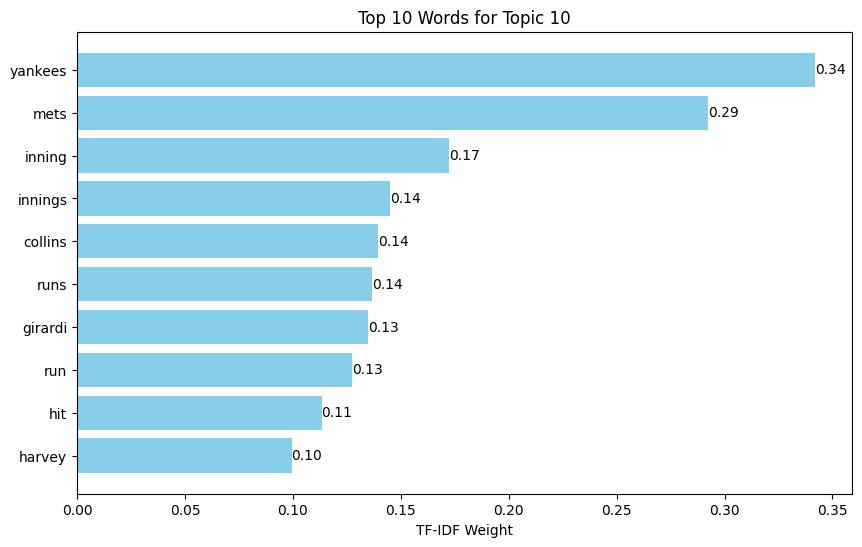

In [ ]:
# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top 10 words for each topic
for i, topic in enumerate(lsa_model.components_):
    # Get the indices of the top 10 words
    top_indices = topic.argsort()[-10:][::-1]
    # Get the TF-IDF weights for the top words
    top_weights = [topic[index] for index in top_indices]
    # Get the corresponding words
    top_words = [feature_names[index] for index in top_indices]

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_words)), top_weights, align='center', color='skyblue')
    plt.yticks(range(len(top_words)), top_words)
    plt.xlabel('TF-IDF Weight')
    plt.title(f'Top 10 Words for Topic {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest weight at the top

    # Add count at the end of each bar
    for j, weight in enumerate(top_weights):
        plt.text(weight, j, f'{weight:.2f}', ha='left', va='center')  # Display weight with two decimal places

    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


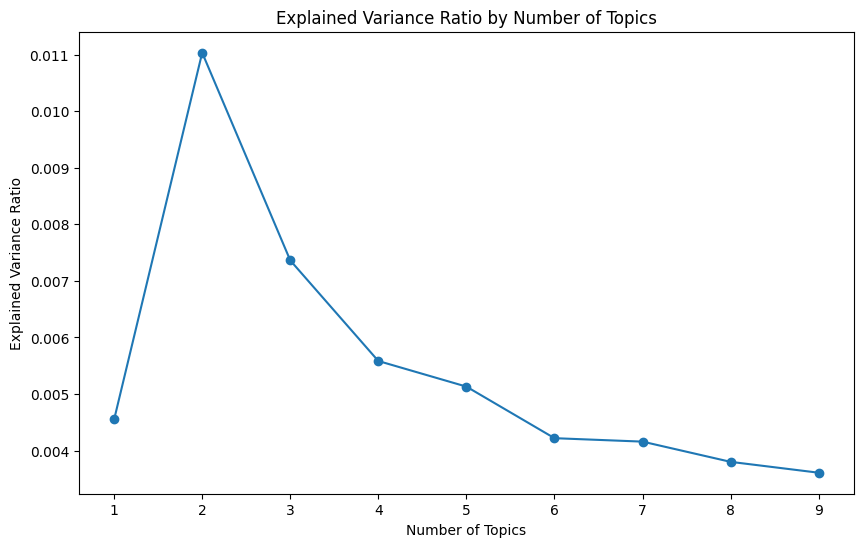

In [ ]:
# Load the CSV file containing the articles
df = pd.read_csv("/content/nytimes_news_articles.csv")

# Drop rows with missing values in the 'content' column
df.dropna(subset=['content'], inplace=True)

# Extract the text data from the appropriate column
articles = df['content']

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(articles)

# Apply Latent Semantic Analysis (LSA)
num_topics = 9  # Specify the number of topics
lsa_model = TruncatedSVD(n_components=num_topics, random_state=65)
lsa_features = lsa_model.fit_transform(tfidf_matrix)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_topics+1), lsa_model.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Explained Variance Ratio')
plt.show()
